<a href="https://colab.research.google.com/github/Shisiajoy/MACHINE-LEARNING-1/blob/main/start_up_success_fail_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA AND LIBRARY IMPORTATION

In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
import itertools
import random
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')



In [2]:
data = pd.read_csv("/content/startup data.csv")

In [3]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


## EDA AND DATA CLEANING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
data.shape

(923, 49)

In [6]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

1.Unnamed: 0

This is typically an index column that gets created automatically when you read a CSV file into a DataFrame.

2.state_code  : the code of the state where the startup is located (e.g., CA for California).

3.latitude : the latitude coordinate of the startup's location.

4.longitude : the longitude coordinate of the startup's location.

5.zip_code : the postal code of the startup's location.

6.id :  a unique identifier for each startup in the dataset.

7.city : the city where the startup is located.

8.Unnamed: 6

Similar to "Unnamed: 0", this could be an extraneous column resulting from the CSV import. If it doesn't contain valuable information.

9.name : the name of the startup.

10.labels : categorical labels associated with the startup, potentially used for classification purposes.

11.founded_at : the date when the startup was founded.

12.closed_at : the date when the startup closed down, if applicable.

13.first_funding_at : the date when the startup received its first funding.

14.last_funding_at :  the date when the startup received its most recent funding.

15.age_first_funding_year :  represents the age of the startup in years at the time of its first funding.

16.age_last_funding_year : represents the age of the startup in years at the time of its most recent funding.

17.age_first_milestone_year : represents the age of the startup in years when it reached its first significant milestone.

18.age_last_milestone_year : represents the age of the startup in years when it reached its most recent significant milestone.

19.relationships : represent the number of business relationships or partnerships the startup has.

20.funding_rounds :  the number of funding rounds the startup has gone through.

21.funding_total_usd :  contains the total amount of funding the startup has received, in USD.

22.milestones : the number of milestones achieved by the startup.

23.state_code.1 : This seems like a duplicate of the "state_code" column and can likely be dropped.

24.is_CA :  indicates whether the startup is located in California (1 if true, 0 if false).

25.is_NY : indicates whether the startup is located in New York (1 if true, 0 if false).

26.is_MA : indicates whether the startup is located in Massachusetts (1 if true, 0 if false).

27.is_TX :  indicates whether the startup is located in Texas (1 if true, 0 if false).

28.is_otherstate :  indicates whether the startup is located in a state other than CA, NY, MA, or TX (1 if true, 0 if false).

29.category_code : contains a general category code representing the industry or sector of the startup.

30.is_software :  indicates whether the startup is in the software industry (1 if true, 0 if false).

31.is_web : indicates whether the startup operates primarily on the web (1 if true, 0 if false).

32.is_mobile : indicates whether the startup operates primarily in the mobile industry (1 if true, 0 if false).

33.is_enterprise :  indicates whether the startup provides enterprise solutions (1 if true, 0 if false).

34.is_advertising : indicates whether the startup is in the advertising industry (1 if true, 0 if false).

35.is_gamesvideo : indicates whether the startup is in the games or video industry (1 if true, 0 if false).

36.is_ecommerce :  indicates whether the startup operates in the e-commerce industry (1 if true, 0 if false).

37.is_biotech : indicates whether the startup is in the biotechnology industry (1 if true, 0 if false).

38.is_consulting : indicates whether the startup is in the consulting industry (1 if true, 0 if false).

39.is_othercategory :  indicates whether the startup falls into a category other than the specified ones (1 if true, 0 if false).

40.object_id :  unique identifier for the startups.

41.has_VC : indicates whether the startup has received venture capital funding (1 if true, 0 if false).

42.has_angel :  indicates whether the startup has received angel investment (1 if true, 0 if false).

43.has_roundA : indicates whether the startup has received Series A funding (1 if true, 0 if false).

44.has_roundB :  indicates whether the startup has received Series B funding (1 if true, 0 if false).

45.has_roundC : indicates whether the startup has received Series C funding (1 if true, 0 if false).

46.has_roundD : indicates whether the startup has received Series D funding (1 if true, 0 if false).

47.avg_participants : represents the average number of participants in the funding rounds.

48.is_top500 : indicates whether the startup is among the top 500 in some ranking (1 if true, 0 if false).

49.status : indicates the current status of the startup, such as 'success' (acquired or IPO) or 'fail' (closed).

## Numerical data

In [7]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num=data.select_dtypes(include=numeric)
data_num.head()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,738,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,1002,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1


##Categorical data

In [8]:
data_cat=data.select_dtypes(include='object')
data_cat.head()

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,CA,games_video,c:65806,closed


# exploring and dealing with missingness

In [9]:
missing_values = data.isnull().sum()
total_values = len(data)
missing_percentage = (missing_values / total_values) * 100

# Creating a DataFrame to display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display the missing data
print(missing_data)


                          Missing Values  Percentage
Unnamed: 0                             0    0.000000
state_code                             0    0.000000
latitude                               0    0.000000
longitude                              0    0.000000
zip_code                               0    0.000000
id                                     0    0.000000
city                                   0    0.000000
Unnamed: 6                           493   53.412784
name                                   0    0.000000
labels                                 0    0.000000
founded_at                             0    0.000000
closed_at                            588   63.705309
first_funding_at                       0    0.000000
last_funding_at                        0    0.000000
age_first_funding_year                 0    0.000000
age_last_funding_year                  0    0.000000
age_first_milestone_year             152   16.468039
age_last_milestone_year              152   16.

In [10]:
# Checking Missing Values Column
data[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head()


,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,acquired
1,NaN,NaN,7.0055,7.0055,CA,acquired
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,acquired
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,acquired
4,San Francisco CA 94105,10/1/2012,0.0384,0.0384,CA,closed


- Column "closed_at" is a column where StartUp "Closed" so that the empty data should be a StarUp whose status is still "Acquired"

In [11]:

data['closed_at'] = data['closed_at'].fillna(value="31/12/2013")
totalNull = data['closed_at'].isnull().sum()

print('Total Missing Values column "closed_at": ', totalNull)

Total Missing Values column "closed_at":  0


- Some startups might not have a closed_at date because they are still operational. By imputing the missing values with "31/12/2013", we standardize the data, making it easier to handle in subsequent analysis steps.

In [12]:
data[['age_first_milestone_year','age_last_milestone_year','milestones']].head()


,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


- 'age_first_milestone_year' and 'age_last_milestone_year' have null values because the startup does not have milestones. this can be confirmed by looking at the 'milestones' column containing the data 0 must be accompanied by the null 'age_first_milestone_year' and 'age_last_milestone_year' columns. so we decided to fill that null column with a value of 0.

In [13]:
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value="0")
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value="0")

- drop 'state_code.1' row with missing value

In [14]:
data.drop(["state_code.1"], axis=1, inplace=True)

In [15]:
# Drop the 'Unnamed: 6' column
data = data.drop(columns=['Unnamed: 6'])


In [16]:
null=pd.DataFrame(data.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(data.isna().sum()/len(data)*100)
null = null[null["% Missing Values"] > 0]
print(null)
#null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)


Empty DataFrame
Columns: [Null Values, % Missing Values]
Index: []


# Visualize the Target Data (Status)

<Axes: xlabel='status'>

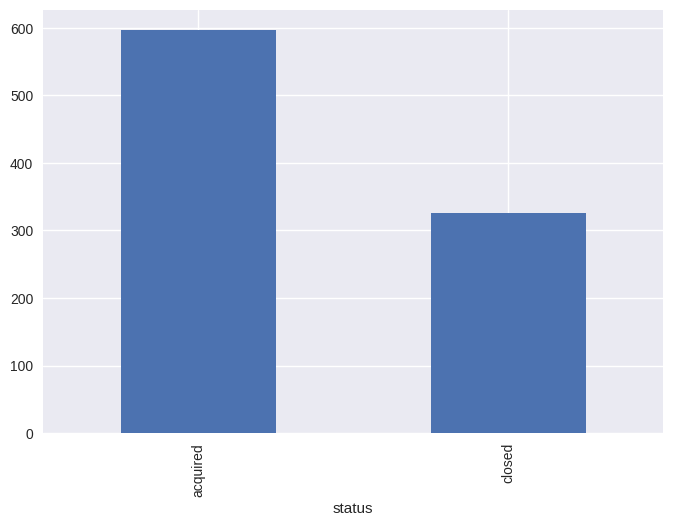

In [17]:
data['status'].value_counts().plot(kind='bar')

In [18]:
data['status'] = data.status.map({'acquired':1, 'closed':0})

# EDA

In [19]:
data['age_first_milestone_year'] = data.age_first_milestone_year.astype(float)
data['age_last_milestone_year'] = data.age_last_milestone_year.astype(float)


(32.5, -0.5)

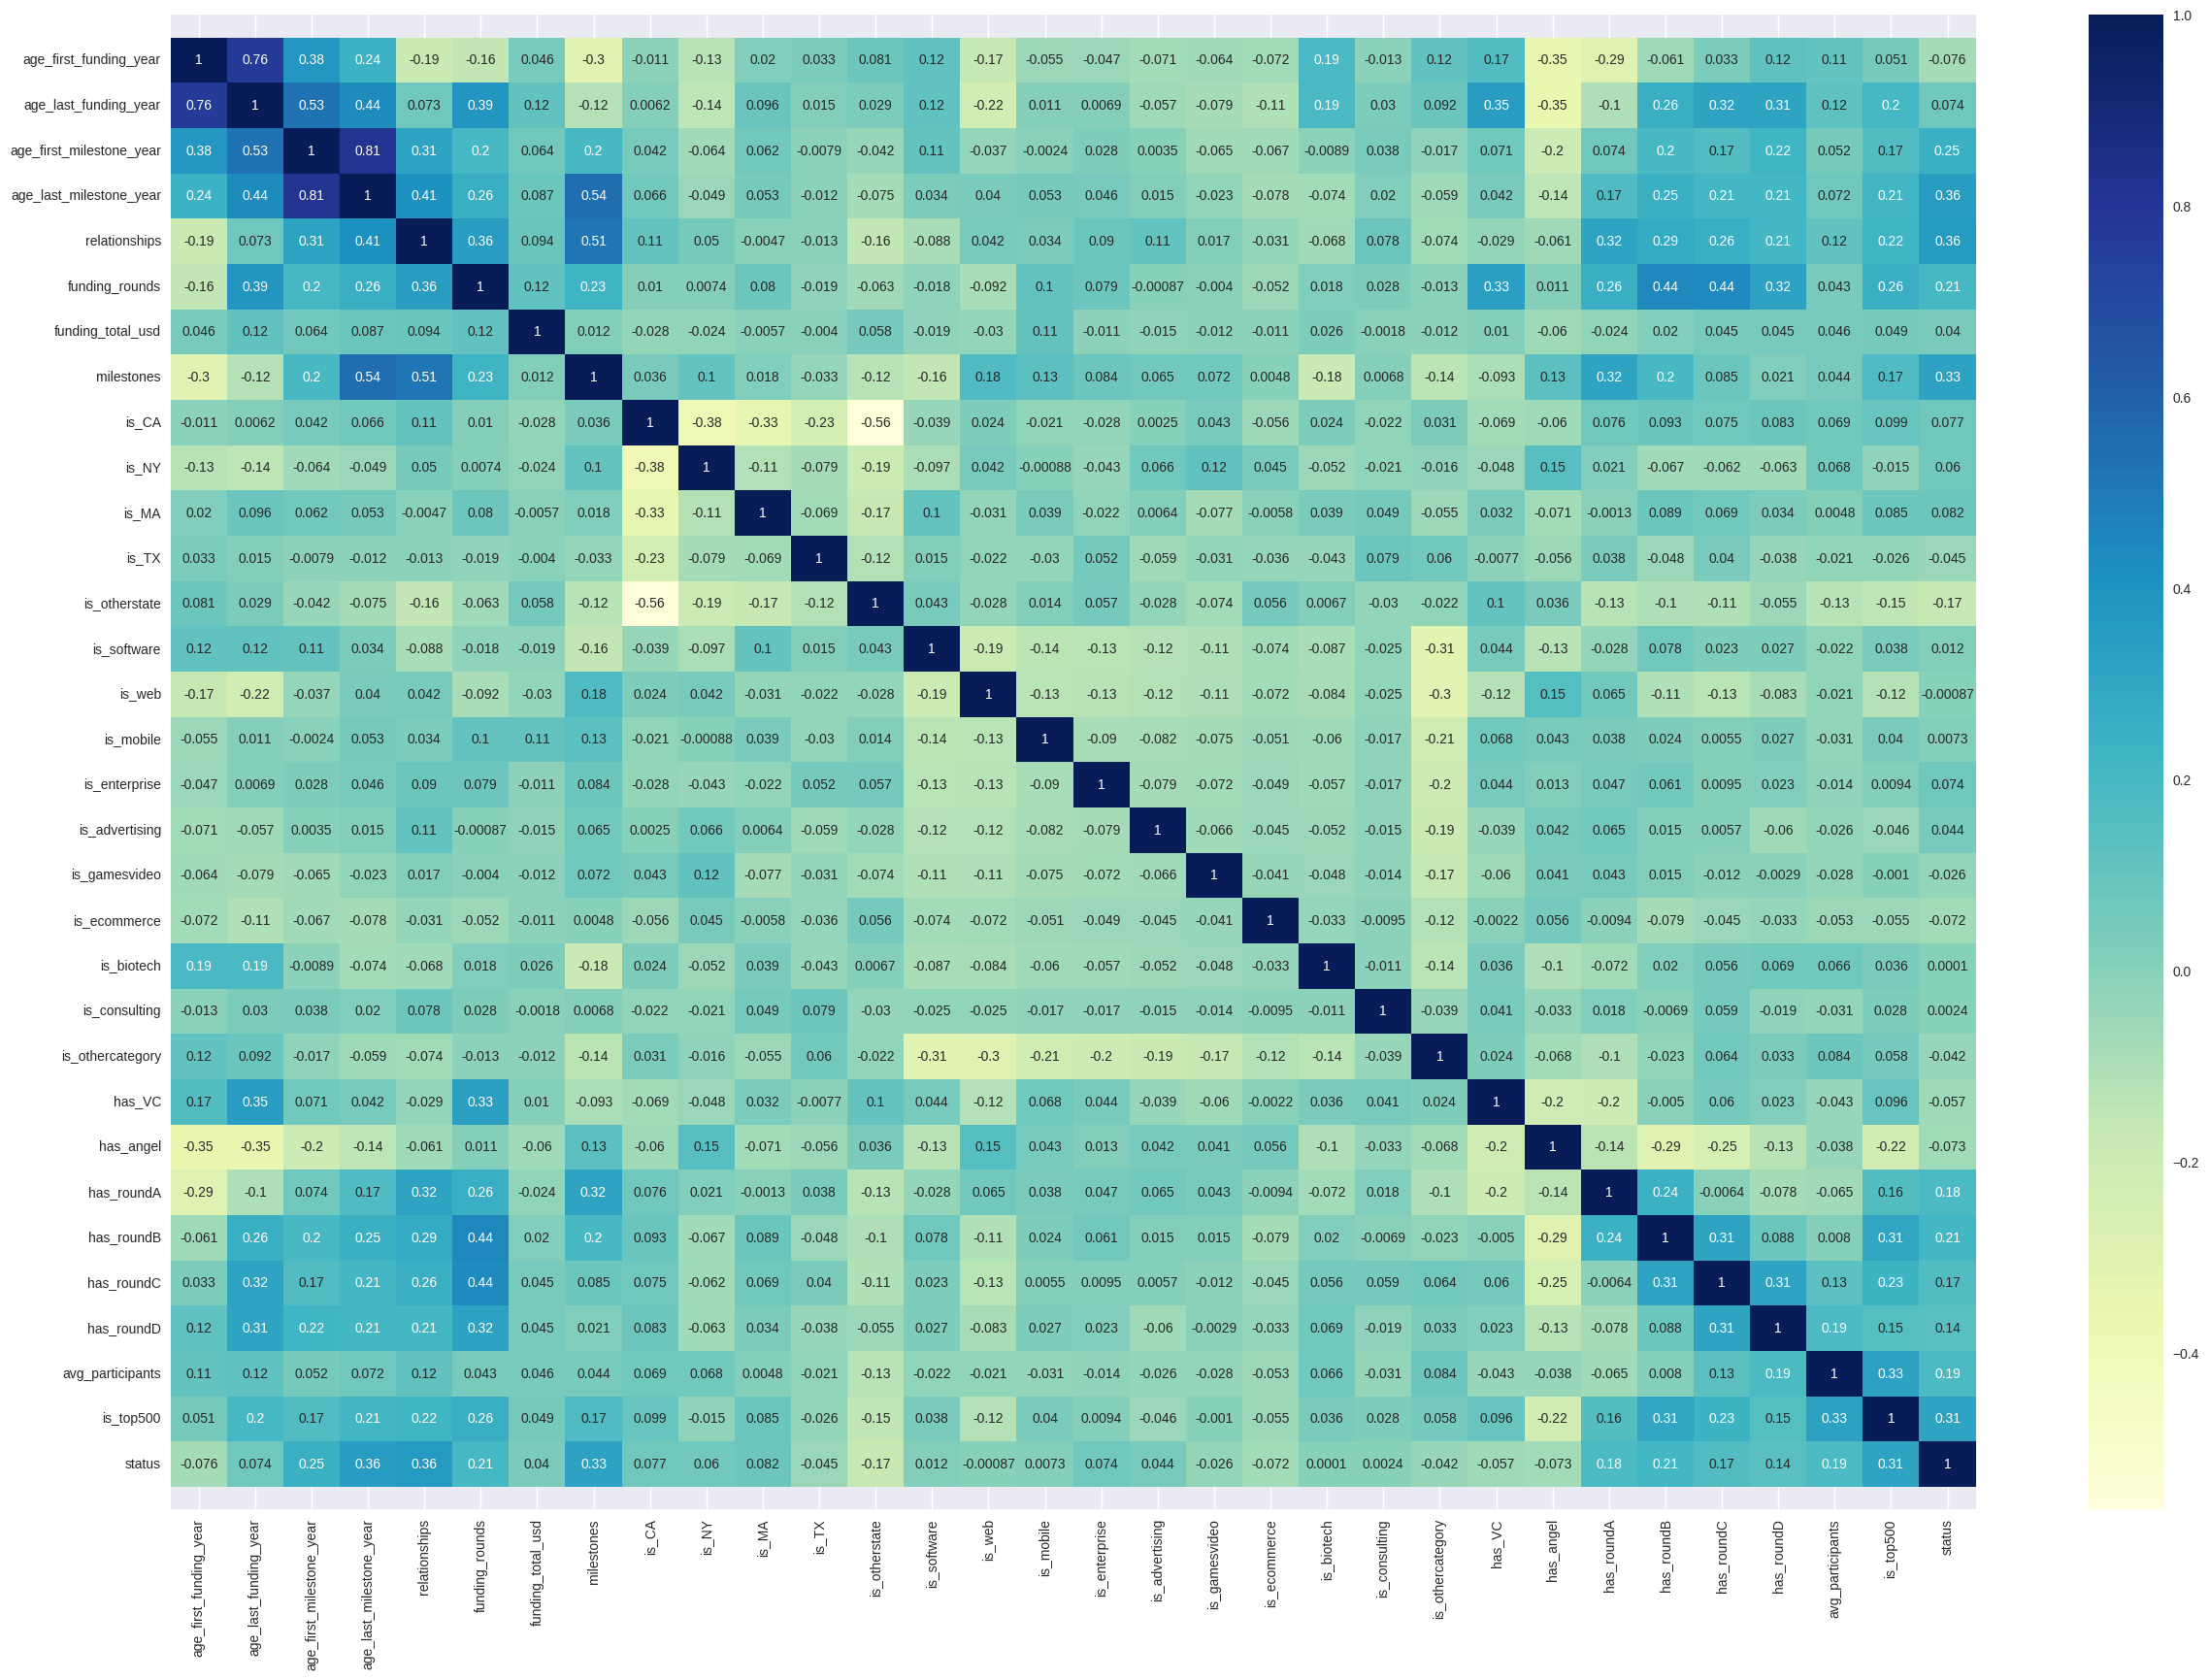

In [20]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = data[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)


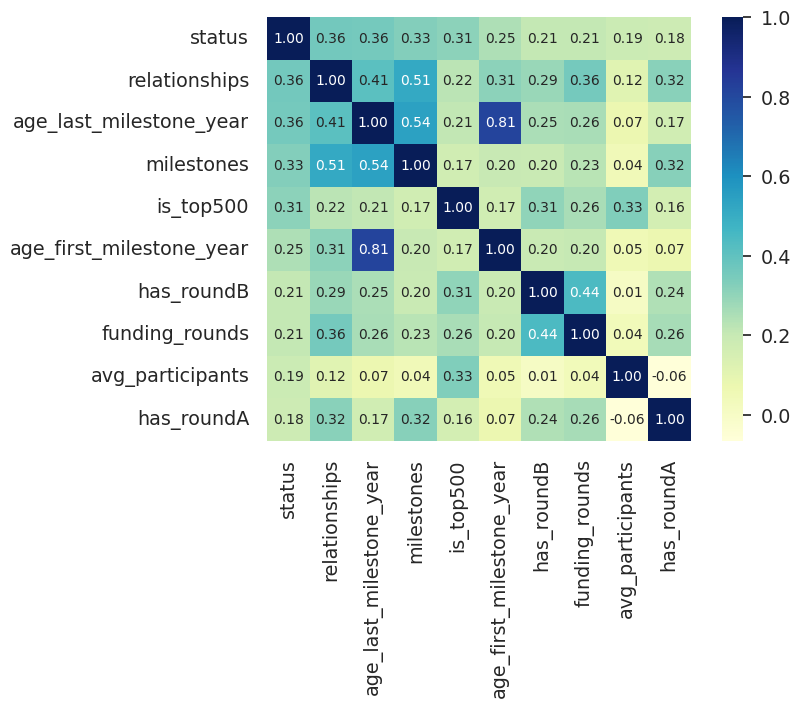

In [21]:
#number of variables for heatmap
cols = data[features].corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


Box plot

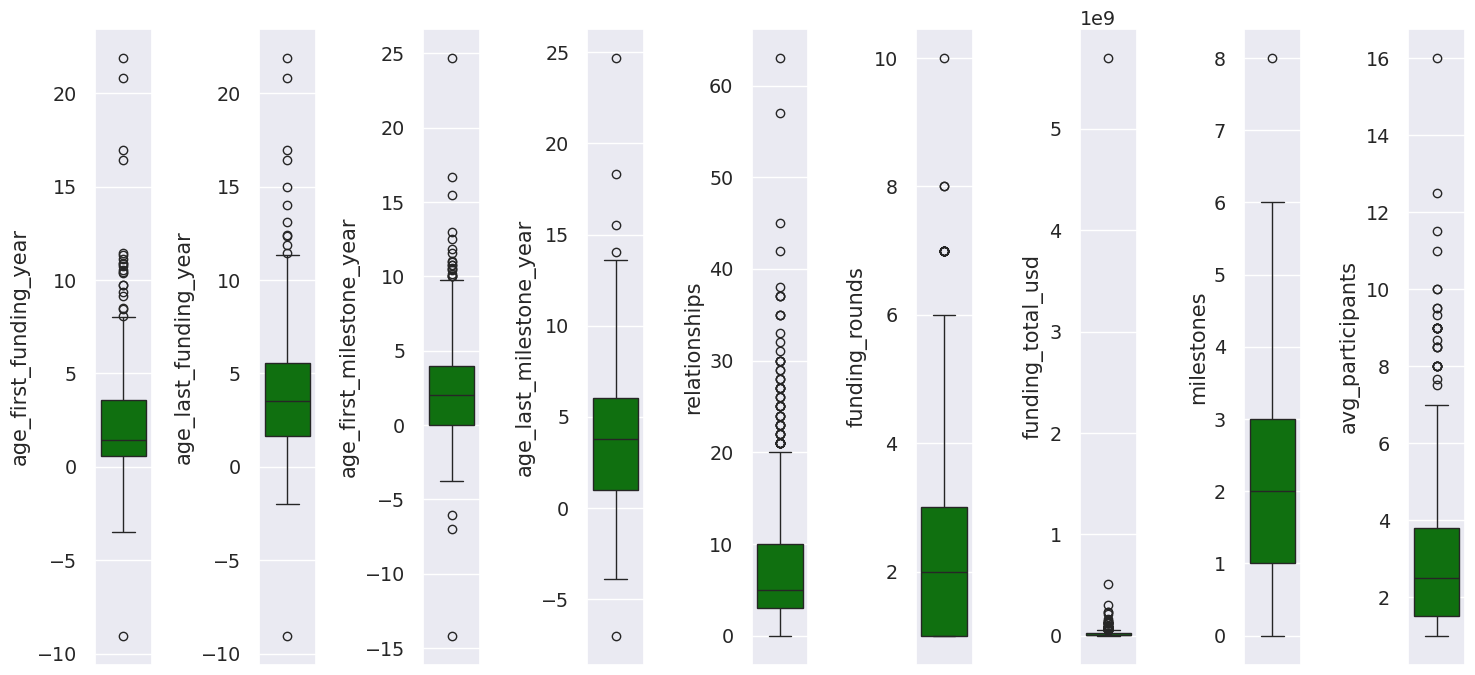

In [22]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=data[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()


Category with the largest number of start ups

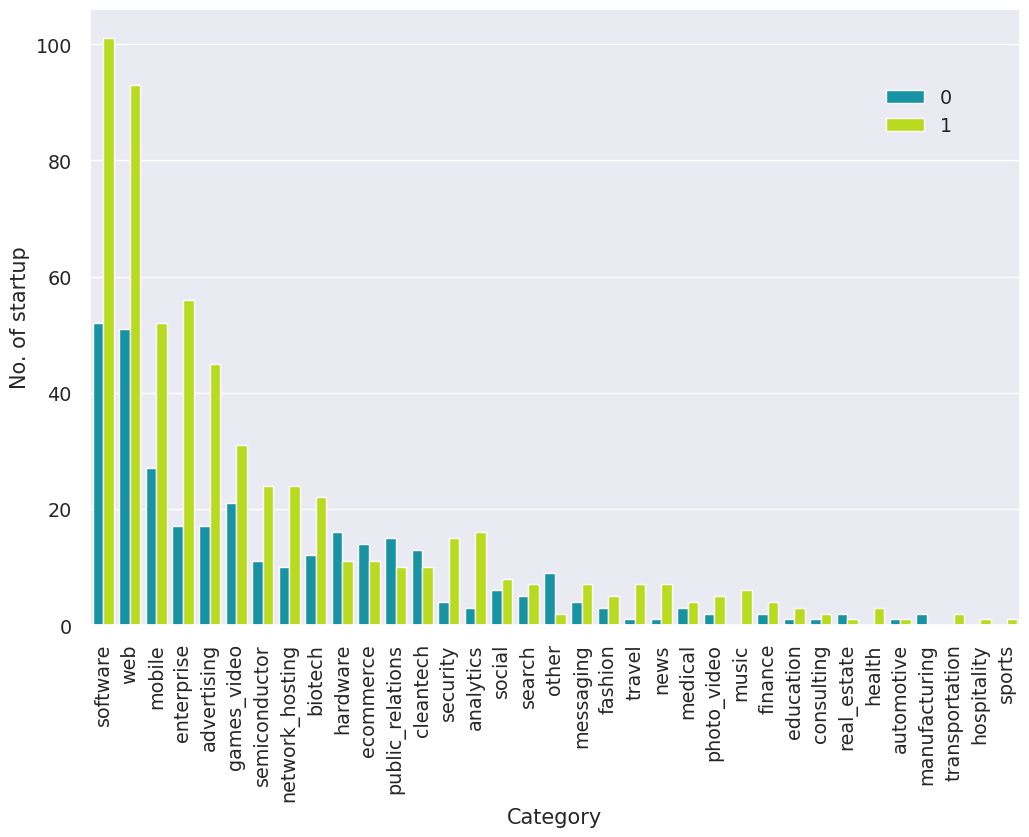

In [23]:

fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=data, palette="nipy_spectral",
              order=data.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

Category with the highest sucess rate

In [24]:
data1 = data[data['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = data[data['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=data.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate

,category_code,total_success,total_closed,total_startup,success_rate
27,travel,7,1,8,87.50
17,news,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


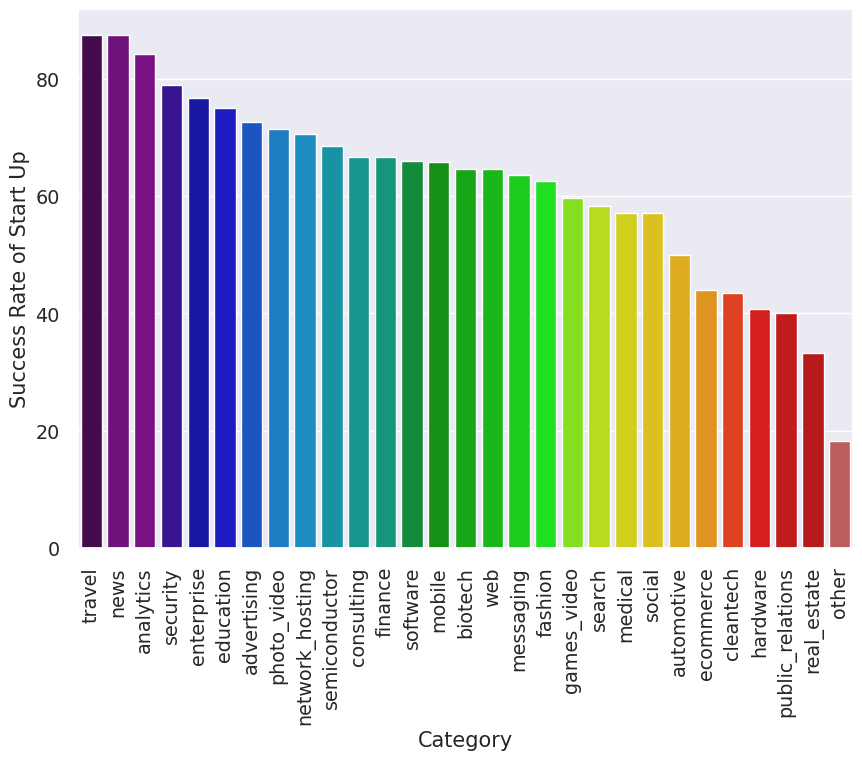

In [25]:

fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,

                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

Category with the highest number of funding

In [26]:
funding_sorted_category = pd.pivot_table(data,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head()


,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096


State with the most number of start ups

In [28]:
trending_statea = data.groupby(['state_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea

,state_code,num_startup
2,CA,488
23,NY,106
12,MA,83
32,WA,42
29,TX,42
3,CO,19
9,IL,18
26,PA,17
31,VA,13
7,GA,11


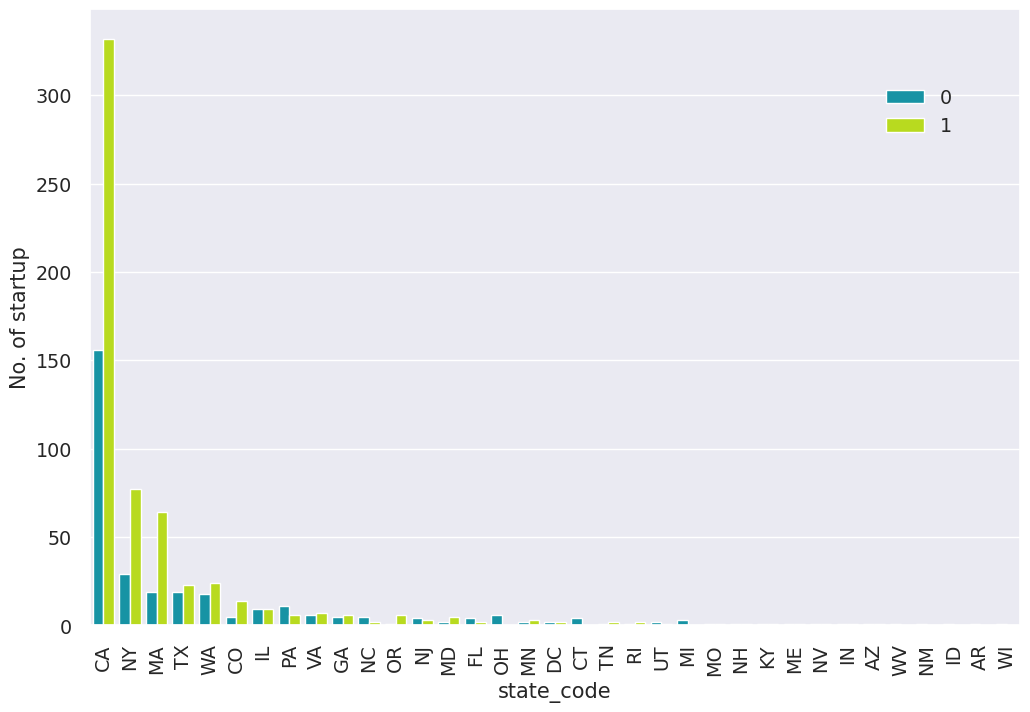

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=data, palette="nipy_spectral",
              order=data.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))


#DATA PREPROCESSING

Check duplicate values

In [32]:
#check
duplicate = data[data.duplicated()]

print("Duplicate Rows :")

Duplicate Rows :


- Drop unused columns for modeling

In [36]:
df = data.drop(['state_code'],axis=1)
df = data.drop(['id'],axis=1)
df = data.drop(['category_code'],axis=1)
df = data.drop(['object_id'],axis=1)
df = data.drop(['zip_code'],axis=1)
df = data.drop(['founded_at'],axis=1)
df = data.drop(['closed_at'],axis=1)
df = data.drop(['first_funding_at'],axis=1)
df = data.drop(['last_funding_at'],axis=1)
df = data.drop(['city'],axis=1)
df = data.drop(['name'],axis=1)
df = data.drop(['Unnamed: 0'],axis=1)
df = data.drop(['latitude','longitude'],axis=1)
df = data.drop(['relationships'],axis=1)


#MODELLING

- split the data

In [38]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df.drop('status', axis = 1) # here we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'

y = df['status'] # Output/Dependent variable

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Random Forest

Training Accuracy : 1.0
Testing Accuracy : 1.0


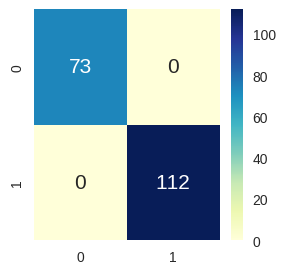

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       112

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

------------------------------------------
ROC Curves              = 1.0
Precision-Recall Curves = 1.0


In [42]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train._get_numeric_data(),y_train)


y_pred_rf = rf.predict(X_test._get_numeric_data())

print("Training Accuracy :", rf.score(X_train._get_numeric_data(), y_train))
print("Testing Accuracy :", rf.score(X_test._get_numeric_data(), y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

# GradientBoosting Classifier

Training Accuracy : 1.0
Testing Accuracy : 1.0


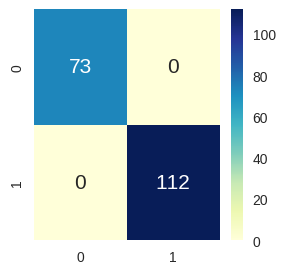

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       112

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185

------------------------------------------
ROC Curves              = 1.0
Precision-Recall Curves = 1.0


In [47]:
#train
gbc = GradientBoostingClassifier(learning_rate=0.02,
                    max_depth=4,
                    random_state=100, n_estimators=1000)


gbc.fit(X_train._get_numeric_data(),y_train)

#predict
y_predicted_gb = gbc.predict(X_test._get_numeric_data())

print("Training Accuracy :", gbc.score(X_train._get_numeric_data(), y_train))
print("Testing Accuracy :", gbc.score(X_test._get_numeric_data(), y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_gb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)
f1 = f1_score(y_test, y_predicted_gb)
Precision_Recall_gbs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gbs)